In [78]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'16',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '801dfaba-c2a2-4df5-8d19-995e359afdc4',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-08-11T18:42:45.802Z', 'error_code': 0, 'error_message': None, 'elapsed': 43, 'credit_count': 1, 'notice': None, 'total_count': 10035}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11631, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [79]:
type(data)

dict

In [82]:
import pandas as pd

# this allows you to see all the columns and not a restricted amount

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [84]:
# normalizes the data
# creating a timestamp column for the data
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11631,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19738553.00000,19738553.00000,False,NaN,1,NaN,NaN,None,2024-08-11T18:41:00.000Z,60200.37590,18028866399.75327,-53.02480,0.10657,-0.04361,3.08992,3.10012,-13.16509,-4.09379,1188268310323.50293,56.43270,1264207893901.52002,None,2024-08-11T18:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-11 14:42:47.140536
1,1027,Ethereum,ETH,ethereum,9203,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120267845.85701,120267845.85701,True,NaN,2,NaN,NaN,None,2024-08-11T18:40:00.000Z,2635.19877,11042780037.03398,4.89710,0.28741,0.90301,-2.05796,-16.34319,-26.74056,-10.46066,316929679905.14392,15.04600,316929679905.14001,None,2024-08-11T18:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-11 14:42:47.140536
2,825,Tether USDt,USDT,tether,93921,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,115638558844.62657,117068077122.37193,True,NaN,3,NaN,NaN,None,2024-08-11T18:40:00.000Z,1.00037,34668990787.39991,-0.57030,-0.00343,0.00807,0.09995,0.01302,0.05290,0.05340,115681880738.95995,5.49190,117111934559.87000,None,2024-08-11T18:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-11 14:42:47.140536
3,1839,BNB,BNB,bnb,2206,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145936555.81189,145936555.81189,False,NaN,4,NaN,NaN,None,2024-08-11T18:40:00.000Z,519.40225,1499057658.93860,6.57580,-0.27751,-0.31388,4.20716,-3.15582,-16.88911,-12.41682,75799775985.58055,3.59980,75799775985.58000,None,2024-08-11T18:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-11 14:42:47.140536
4,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,466737552.38920,582111724.12110,True,NaN,5,NaN,NaN,None,2024-08-11T18:40:00.000Z,147.84475,1791363888.67111,-10.71780,-0.57960,-4.33032,7.39883,5.63817,-6.41077,0.41687,69004694662.85899,3.27590,86062159723.44000,None,2024-08-11T18:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-11 14:42:47.140536
5,3408,USDC,USDC,usd-coin,21468,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34452256925.64736,34452256925.64736,False,NaN,6,NaN,NaN,None,2024-08-11T18:40:00.000Z,1.00003,3207039860.17429,-9.78030,-0.00393,0.00458,0.01205,0.00718,0.01669,-0.00183,34453128535.37027,1.63560,34453128535.37000,None,2024-08-11T18:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-11 14:42:47.140536
6,52,XRP,XRP,xrp,1364,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56104361423.00000,99987365591.00000,False,NaN,7,NaN,NaN,None,2024-08-11T18:41:00.000Z,0.56975,1018884183.75532,-11.87100,0.15662,-3.49882,8.71520,21.28061,15.39159,12.62155,31965310447.48834,1.51750,56974733579.95000,None,2024-08-11T18:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-11 14:42:47.140536
7,11419,Toncoin,TON,toncoin,501,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2518460779.35035,5110338511.86593,True,NaN,8,3414166606.00000,21585723388.27334,None,2024-08-11T18:40:00.000Z,6.32240,254882637.25679,-26.18700,-0.22945,-5.50383,6.78331,-13.51747,-14.76051,-13.15768,15922713804.22260,0.75610,32309598876.55000,None,2024-08

In [86]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df,df_append])


In [88]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(30) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [90]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11631,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19738553.00000,19738553.00000,False,NaN,1,NaN,NaN,None,2024-08-11T18:41:00.000Z,60200.37590,18028866399.75327,-53.02480,0.10657,-0.04361,3.08992,3.10012,-13.16509,-4.09379,1188268310323.50293,56.43270,1264207893901.52002,None,2024-08-11T18:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-11 14:42:47.140536
1,1027,Ethereum,ETH,ethereum,9203,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120267845.85701,120267845.85701,True,NaN,2,NaN,NaN,None,2024-08-11T18:40:00.000Z,2635.19877,11042780037.03398,4.89710,0.28741,0.90301,-2.05796,-16.34319,-26.74056,-10.46066,316929679905.14392,15.04600,316929679905.14001,None,2024-08-11T18:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-11 14:42:47.140536
2,825,Tether USDt,USDT,tether,93921,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,115638558844.62657,117068077122.37193,True,NaN,3,NaN,NaN,None,2024-08-11T18:40:00.000Z,1.00037,34668990787.39991,-0.57030,-0.00343,0.00807,0.09995,0.01302,0.05290,0.05340,115681880738.95995,5.49190,117111934559.87000,None,2024-08-11T18:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-11 14:42:47.140536
3,1839,BNB,BNB,bnb,2206,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145936555.81189,145936555.81189,False,NaN,4,NaN,NaN,None,2024-08-11T18:40:00.000Z,519.40225,1499057658.93860,6.57580,-0.27751,-0.31388,4.20716,-3.15582,-16.88911,-12.41682,75799775985.58055,3.59980,75799775985.58000,None,2024-08-11T18:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-11 14:42:47.140536
4,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,466737552.38920,582111724.12110,True,NaN,5,NaN,NaN,None,2024-08-11T18:40:00.000Z,147.84475,1791363888.67111,-10.71780,-0.57960,-4.33032,7.39883,5.63817,-6.41077,0.41687,69004694662.85899,3.27590,86062159723.44000,None,2024-08-11T18:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-11 14:42:47.140536
5,3408,USDC,USDC,usd-coin,21468,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34452256925.64736,34452256925.64736,False,NaN,6,NaN,NaN,None,2024-08-11T18:40:00.000Z,1.00003,3207039860.17429,-9.78030,-0.00393,0.00458,0.01205,0.00718,0.01669,-0.00183,34453128535.37027,1.63560,34453128535.37000,None,2024-08-11T18:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-11 14:42:47.140536
6,52,XRP,XRP,xrp,1364,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56104361423.00000,99987365591.00000,False,NaN,7,NaN,NaN,None,2024-08-11T18:41:00.000Z,0.56975,1018884183.75532,-11.87100,0.15662,-3.49882,8.71520,21.28061,15.39159,12.62155,31965310447.48834,1.51750,56974733579.95000,None,2024-08-11T18:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-11 14:42:47.140536
7,11419,Toncoin,TON,toncoin,501,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2518460779.35035,5110338511.86593,True,NaN,8,3414166606.00000,21585723388.27334,None,2024-08-11T18:40:00.000Z,6.32240,254882637.25679,-26.18700,-0.22945,-5.50383,6.78331,-13.51747,-14.76051,-13.15768,15922713804.22260,0.75610,32309598876.55000,None,2024-08

In [92]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [94]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11631,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19738553.00000,19738553.00000,False,NaN,1,NaN,NaN,None,2024-08-11T18:41:00.000Z,60200.37590,18028866399.75327,-53.02480,0.10657,-0.04361,3.08992,3.10012,-13.16509,-4.09379,1188268310323.50293,56.43270,1264207893901.52002,None,2024-08-11T18:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-11 14:42:47.140536
1,1027,Ethereum,ETH,ethereum,9203,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120267845.85701,120267845.85701,True,NaN,2,NaN,NaN,None,2024-08-11T18:40:00.000Z,2635.19877,11042780037.03398,4.89710,0.28741,0.90301,-2.05796,-16.34319,-26.74056,-10.46066,316929679905.14392,15.04600,316929679905.14001,None,2024-08-11T18:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-11 14:42:47.140536
2,825,Tether USDt,USDT,tether,93921,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,115638558844.62657,117068077122.37193,True,NaN,3,NaN,NaN,None,2024-08-11T18:40:00.000Z,1.00037,34668990787.39991,-0.57030,-0.00343,0.00807,0.09995,0.01302,0.05290,0.05340,115681880738.95995,5.49190,117111934559.87000,None,2024-08-11T18:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-11 14:42:47.140536
3,1839,BNB,BNB,bnb,2206,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145936555.81189,145936555.81189,False,NaN,4,NaN,NaN,None,2024-08-11T18:40:00.000Z,519.40225,1499057658.93860,6.57580,-0.27751,-0.31388,4.20716,-3.15582,-16.88911,-12.41682,75799775985.58055,3.59980,75799775985.58000,None,2024-08-11T18:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-11 14:42:47.140536
4,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,466737552.38920,582111724.12110,True,NaN,5,NaN,NaN,None,2024-08-11T18:40:00.000Z,147.84475,1791363888.67111,-10.71780,-0.57960,-4.33032,7.39883,5.63817,-6.41077,0.41687,69004694662.85899,3.27590,86062159723.44000,None,2024-08-11T18:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-11 14:42:47.140536
5,3408,USDC,USDC,usd-coin,21468,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34452256925.64736,34452256925.64736,False,NaN,6,NaN,NaN,None,2024-08-11T18:40:00.000Z,1.00003,3207039860.17429,-9.78030,-0.00393,0.00458,0.01205,0.00718,0.01669,-0.00183,34453128535.37027,1.63560,34453128535.37000,None,2024-08-11T18:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-11 14:42:47.140536
6,52,XRP,XRP,xrp,1364,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56104361423.00000,99987365591.00000,False,NaN,7,NaN,NaN,None,2024-08-11T18:41:00.000Z,0.56975,1018884183.75532,-11.87100,0.15662,-3.49882,8.71520,21.28061,15.39159,12.62155,31965310447.48834,1.51750,56974733579.95000,None,2024-08-11T18:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-11 14:42:47.140536
7,11419,Toncoin,TON,toncoin,501,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2518460779.35035,5110338511.86593,True,NaN,8,3414166606.00000,21585723388.27334,None,2024-08-11T18:40:00.000Z,6.32240,254882637.25679,-26.18700,-0.22945,-5.50383,6.78331,-13.51747,-14.76051,-13.15768,15922713804.22260,0.75610,32309598876.55000,None,2024-08

In [96]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.09081,-0.02216,3.19017,3.18056,-13.12137,-4.07016
Ethereum,0.31445,0.90603,-2.15745,-16.20136,-26.70914,-10.41686
Tether USDt,-0.00447,0.00156,0.08897,0.00826,0.04572,0.05364
BNB,-0.27326,-0.45364,4.18383,-3.12420,-16.97705,-12.41278
Solana,-0.57545,-4.37054,7.27138,5.70762,-6.55908,0.42220
USDC,-0.00609,0.00508,0.00635,0.00472,0.01084,0.00116
XRP,0.17819,-3.54695,8.62803,21.38187,15.39137,12.66589
Toncoin,-0.24088,-5.50679,6.73900,-13.50794,-14.76916,-13.17190
Dogecoin,-0.18945,-0.53205,3.23859,-2.68798,-29.64308,-29.61684


In [98]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.09081
              quote.USD.percent_change_24h    -0.02216
              quote.USD.percent_change_7d      3.19017
              quote.USD.percent_change_30d     3.18056
              quote.USD.percent_change_60d   -13.12137
              quote.USD.percent_change_90d    -4.07016
Ethereum      quote.USD.percent_change_1h      0.31445
              quote.USD.percent_change_24h     0.90603
              quote.USD.percent_change_7d     -2.15745
              quote.USD.percent_change_30d   -16.20136
              quote.USD.percent_change_60d   -26.70914
              quote.USD.percent_change_90d   -10.41686
Tether USDt   quote.USD.percent_change_1h     -0.00447
              quote.USD.percent_change_24h     0.00156
              quote.USD.percent_change_7d      0.08897
              quote.USD.percent_change_30d     0.00826
              quote.USD.percent_change_60d     0.04572
              quote.US

In [100]:
type(df4)

pandas.core.series.Series

In [102]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.09081
             quote.USD.percent_change_24h  -0.02216
             quote.USD.percent_change_7d    3.19017
             quote.USD.percent_change_30d   3.18056
             quote.USD.percent_change_60d -13.12137
             quote.USD.percent_change_90d  -4.07016
Ethereum     quote.USD.percent_change_1h    0.31445
             quote.USD.percent_change_24h   0.90603
             quote.USD.percent_change_7d   -2.15745
             quote.USD.percent_change_30d -16.20136
             quote.USD.percent_change_60d -26.70914
             quote.USD.percent_change_90d -10.41686
Tether USDt  quote.USD.percent_change_1h   -0.00447
             quote.USD.percent_change_24h   0.00156
             quote.USD.percent_change_7d    0.08897
             quote.USD.percent_change_30d   0.00826
             quote.USD.percent_change_60d   0.04572
             quote.USD.percent_change_90d   0.05364
BNB          quote.USD.percent_change_1h   -0.27326
             quote.USD.percent_change_24h  -0.45364
             quote.USD.percent_change_7d    4.18383
             quote.USD.percent_change_30d  -3.12420
             quote.USD.percent_change_60d -16.97705
             quote.USD.percent_change_90d -12.41278
Solana       quote.USD.percent_change_1h   -0.57545
             quote.USD.percent_change_24h  -4.37054
             quote.USD.percent_change_7d    7.27138
             quote.USD.percent_change_30d   5.70762
             quote.USD.percent_change_60d  -6.55908
             quote.USD.percent_change_90d   0.42220
USDC         quote.USD.percent_change_1h   -0.00609
             quote.USD.percent_change_24h   0.00508
             quote.USD.percent_change_7d    0.00635
             quote.USD.percent_change_30d   0.00472
             quote.USD.percent_change_60d   0.01084
             quote.USD.percent_change_90d   0.00116
XRP          quote.USD.percent_change_1h    0.17819
             quote.USD.percent_change_24h  -3.54695
             quote.USD.percent_change_7d    8.62803
             quote.USD.percent_change_30d  21.38187
             quote.USD.percent_change_60d  15.39137
             quote.USD.percent_change_90d  12.66589
Toncoin      quote.USD.percent_change_1h   -0.24088
             quote.USD.percent_change_24h  -5.50679
             quote.USD.percent_change_7d    6.73900
             quote.USD.percent_change_30d -13.50794
             quote.USD.percent_change_60d -14.76916
             quote.USD.percent_change_90d -13.17190
Dogecoin     quote.USD.percent_change_1h   -0.18945
             quote.USD.percent_change_24h  -0.53205
             quote.USD.percent_change_7d    3.23859
             quote.USD.percent_change_30d  -2.68798
             quote.USD.percent_change_60d -29.64308
             quote.USD.percent_change_90d -29.61684
Cardano      quote.USD.percent_change_1h   -0.22405
             quote.USD.percent_change_24h  -2.04907
             quote.USD.percent_change_7d    0.03962
             quote.USD.percent_change_30d -18.05274
             quote.USD.percent_change_60d -22.81786
             quote.USD.percent_change_90d -22.72735
TRON         quote.USD.percent_change_1h   -0.01252
             quote.USD.percent_change_24h  -0.64771
             quote.USD.percent_change_7d    1.77479
             quote.USD.percent_change_30d  -5.96504
             quote.USD.percent_change_60d   9.73012
             quote.USD.percent_change_90d   2.11484
Avalanche    quote.USD.percent_change_1h   -0.16285
             quote.USD.percent_change_24h  -2.35530
             quote.USD.percent_change_7d    0.31311
             quote.USD.percent_change_30d -17.61690
             quote.USD.percent_change_60d -36.98046
             quote.USD.percent_change_90d -35.06027
Shiba Inu    quote.USD.percent_change_1h    0.02520
             quote.USD.percent_change_24h  -1.81092
             quote.USD.percent_change_7d    4.19405
             quote.USD.percent_change_30d

In [104]:
df5.count()

values    96
dtype: int64

In [106]:
index = pd.Index(range(96))


df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.09081
1,Bitcoin,quote.USD.percent_change_24h,-0.02216
2,Bitcoin,quote.USD.percent_change_7d,3.19017
3,Bitcoin,quote.USD.percent_change_30d,3.18056
4,Bitcoin,quote.USD.percent_change_60d,-13.12137
5,Bitcoin,quote.USD.percent_change_90d,-4.07016
6,Ethereum,quote.USD.percent_change_1h,0.31445
7,Ethereum,quote.USD.percent_change_24h,0.90603
8,Ethereum,quote.USD.percent_change_7d,-2.15745
9,Ethereum,quote.USD.percent_change_30d,-16.20136


In [108]:
df7 = df6.rename(columns ={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.09081
1,Bitcoin,quote.USD.percent_change_24h,-0.02216
2,Bitcoin,quote.USD.percent_change_7d,3.19017
3,Bitcoin,quote.USD.percent_change_30d,3.18056
4,Bitcoin,quote.USD.percent_change_60d,-13.12137
5,Bitcoin,quote.USD.percent_change_90d,-4.07016
6,Ethereum,quote.USD.percent_change_1h,0.31445
7,Ethereum,quote.USD.percent_change_24h,0.90603
8,Ethereum,quote.USD.percent_change_7d,-2.15745
9,Ethereum,quote.USD.percent_change_30d,-16.20136


In [ ]:
df7 = df7['percent_change'].replace(['quote.USD.percent_change_1h'], ['1h'])
df7

In [110]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h','24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.09081
1,Bitcoin,24h,-0.02216
2,Bitcoin,7d,3.19017
3,Bitcoin,30d,3.18056
4,Bitcoin,60d,-13.12137
5,Bitcoin,90d,-4.07016
6,Ethereum,1h,0.31445
7,Ethereum,24h,0.90603
8,Ethereum,7d,-2.15745
9,Ethereum,30d,-16.20136


In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

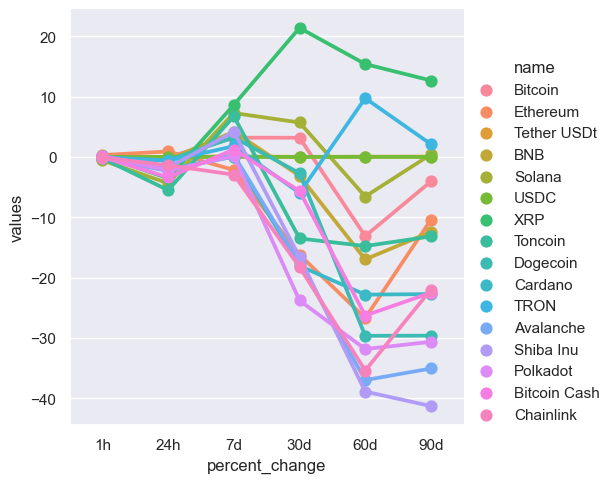

In [114]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')

In [116]:
df8 = df[['name','quote.USD.price', 'timestamp']]

df9 = df8.query("name == 'Bitcoin'")

df9

,name,quote.USD.price,timestamp
0,Bitcoin,60200.37590,2024-08-11 14:42:47.140536
0,Bitcoin,60210.05620,2024-08-11 14:42:54.903700
0,Bitcoin,60210.05620,2024-08-11 14:43:25.288951
0,Bitcoin,60210.05620,2024-08-11 14:43:55.705012
0,Bitcoin,60210.05620,2024-08-11 14:44:26.112327
0,Bitcoin,60220.02311,2024-08-11 14:44:56.568522


C:\Users\troyw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\troyw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

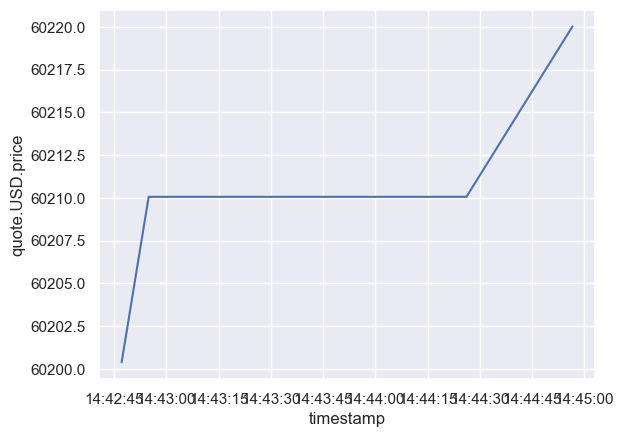

In [118]:
sns.set_theme(style = 'darkgrid')

sns.lineplot(x= 'timestamp', y = 'quote.USD.price', data = df9)